In [1]:
from src.binaryClassificationModel import BinaryClassificationModel
import pickle
import torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

with open('../data/processed/preprocessed_trainSet.pkl', 'rb') as f:
    params = pickle.load(f)
X_train, X_test, y_train, y_test = train_test_split(params['X'], params['y'], test_size=0.2, random_state=0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(torch.version.cuda)

Using device: cuda
11.8


C:\Users\sheng\.conda\envs\poisonous_mushrooms\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\sheng\.conda\envs\poisonous_mushrooms\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Epoch 1, Loss: 0.4909, Accuracy: 0.7597
Epoch 2, Loss: 0.2572, Accuracy: 0.8999
Epoch 3, Loss: 0.1399, Accuracy: 0.9584
Epoch 4, Loss: 0.0977, Accuracy: 0.9739
Epoch 5, Loss: 0.0826, Accuracy: 0.9786


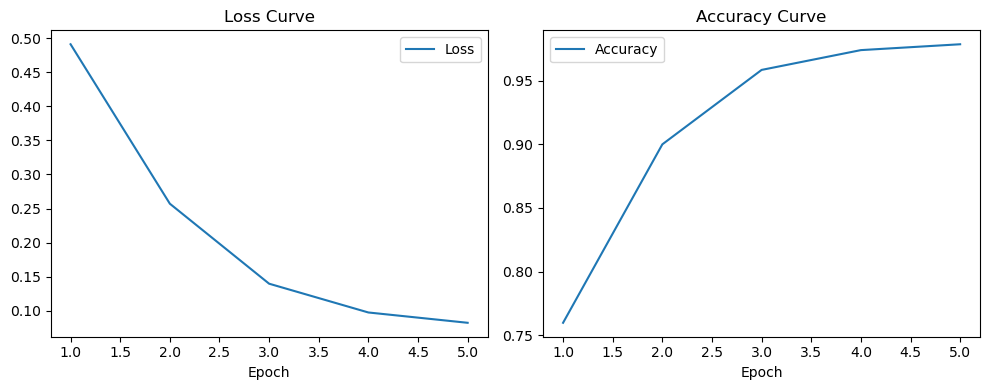

Epoch 6, Loss: 0.0750, Accuracy: 0.9805
Epoch 7, Loss: 0.0710, Accuracy: 0.9817
Epoch 8, Loss: 0.0675, Accuracy: 0.9826
Epoch 9, Loss: 0.0654, Accuracy: 0.9830
Epoch 10, Loss: 0.0635, Accuracy: 0.9835


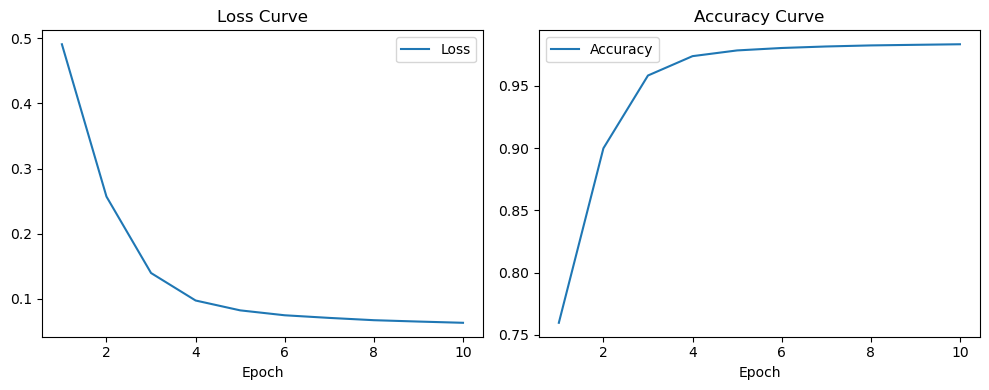

Epoch 11, Loss: 0.0619, Accuracy: 0.9838
Epoch 12, Loss: 0.0607, Accuracy: 0.9842
Epoch 13, Loss: 0.0595, Accuracy: 0.9846
Epoch 14, Loss: 0.0585, Accuracy: 0.9852
Epoch 15, Loss: 0.0573, Accuracy: 0.9856


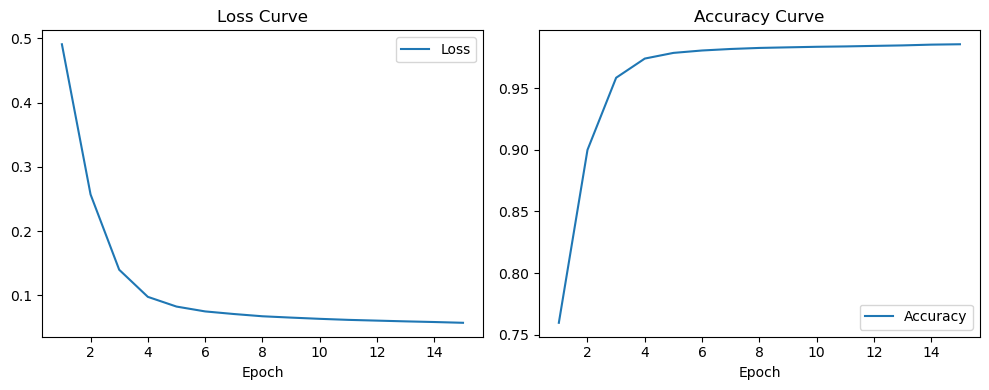

Epoch 16, Loss: 0.0565, Accuracy: 0.9861
Epoch 17, Loss: 0.0556, Accuracy: 0.9857
Epoch 18, Loss: 0.0550, Accuracy: 0.9863
Epoch 19, Loss: 0.0544, Accuracy: 0.9862
Epoch 20, Loss: 0.0542, Accuracy: 0.9866


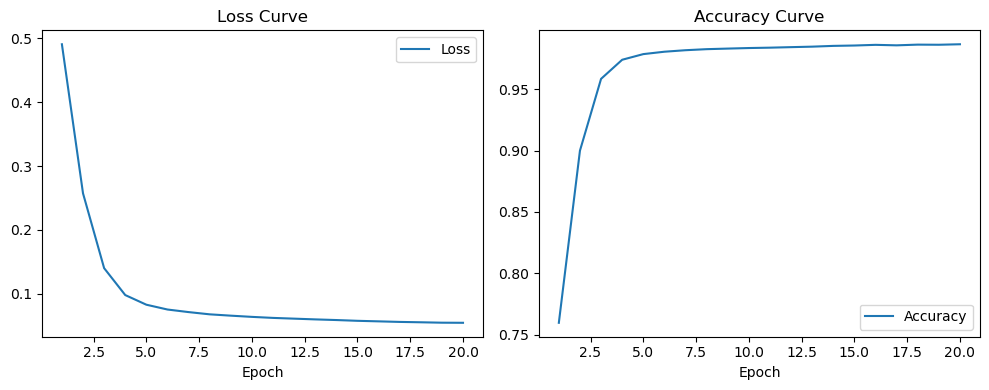

Epoch 21, Loss: 0.0537, Accuracy: 0.9866
Epoch 22, Loss: 0.0530, Accuracy: 0.9867
Epoch 23, Loss: 0.0528, Accuracy: 0.9871
Epoch 24, Loss: 0.0521, Accuracy: 0.9871
Epoch 25, Loss: 0.0519, Accuracy: 0.9873


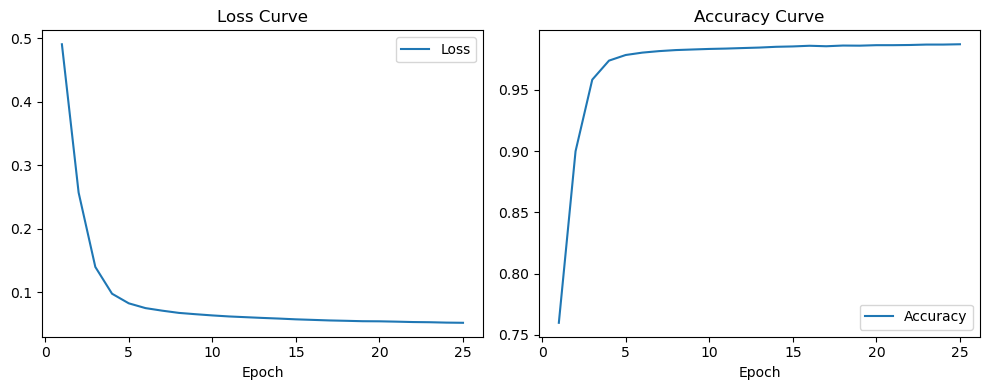

Epoch 26, Loss: 0.0511, Accuracy: 0.9873
Epoch 27, Loss: 0.0510, Accuracy: 0.9878
Epoch 28, Loss: 0.0507, Accuracy: 0.9877
Epoch 29, Loss: 0.0500, Accuracy: 0.9880
Epoch 30, Loss: 0.0499, Accuracy: 0.9876


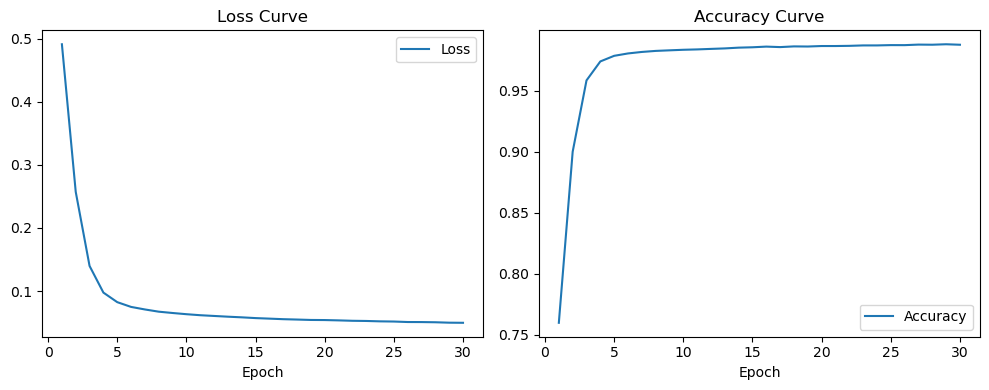

In [3]:
from src.tools import train_one_epoch

model = BinaryClassificationModel(X_train.shape[1])
model = model.to(device)

dataset = list(zip(X_train, y_train))
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

metrics = {
    "loss": [],
    "accuracy": [],
}

for epoch in range(30):
    avg_loss, accuracy = train_one_epoch(model, dataloader, device, lr=1e-4)

    metrics["loss"].append(avg_loss)
    metrics["accuracy"].append(accuracy)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    if (epoch + 1) % 5 == 0 or epoch == 29:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        axes[0].plot(range(1, len(metrics["loss"]) + 1), metrics["loss"], label="Loss")
        axes[1].plot(range(1, len(metrics["accuracy"]) + 1), metrics["accuracy"], label="Accuracy")

        axes[0].set_title("Loss Curve")
        axes[1].set_title("Accuracy Curve")

        axes[0].set_xlabel("Epoch")
        axes[1].set_xlabel("Epoch")

        axes[0].legend()
        axes[1].legend()

        plt.tight_layout()
        plt.show()

In [8]:
torch.save(model.state_dict(), "../models/BinaryClassificationModel.pth")